# Informações dos dados obtidos.

O conjunto de dados contém 9358 resultados médios de 5 sensores químicos de um dispositivo multisensor (PTXX.SX). O dispositivo estava localizado a nível da rua, dentro de uma cidade significativamente poluída. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano). Valores ausentes são marcados com o valor -200. A medida de outros sensores também está disponível e algumas podem ser redundantes. ***A variável chave a ser analisada é PT08.S1 (CO), concentração de CO na atmosfera.***
Informação das colunas:

1.  Date (DD/MM/YYYY)
2.  Time (HH.MM.SS)
3.  PT08.S1 (CO) – Variável de predição
4.  Non Metanic HydroCarbons Concentration (mg/m^3)
5.  Benzene Concentration (mg/m^3)
6.  PT08.S2 (NMHC)
7.  NOx Concentration (ppb)
8.  PT08.S3 (NOx)
9.  NO2 Concentration (mg/m^3)
10. PT08.S4 (NO2s)
11. PT08.S5 (O3)
12. Temperature (C)
13. Relative Humidity (%)
14. AH Absolute Humidity
  


# Objetivo.
 
A primeira parte foi encarregada de tratar os dados disponibilizados. Agora essa parte está encarregada de analisá-los.


# Funções.

In [12]:

def analise_estacionaridade(df,ind):

  print('Teste de estacionaridade')

  kpss = statsmodels.tsa.stattools.kpss(df[ind])
  print('Estatítica do teste: {:.4f}'.format(kpss[0]))
  print('p_valor: {:.4f}'.format(kpss[1]))
  print('Valores Críticos:')
  for chave, valor in kpss[3].items():
    print('{}: {:.4f}'.format(chave, valor))

# Relacioando  os dias da semana com a taxa de CO
def dist_semana_h (df2,i):
  d= df2[df2['Dia da Semana'] == i]
  cons_CO = d.groupby('Time').mean()['PT08.S1(CO)']
  return cons_CO

# determinando as estações do ano.
def station (df2):
  df2['Estações'] =  'a'

  #  Acrecetando a estação da Primavera
  t = (df2['Date'] >='2004-03-01') & (df2['Date'] <='2004-05-31')
  t = np.where(t == True)[0]
  df2.loc[t, 'Estações'] =  'Primavera'

  # Acrecetando a estação do Verão
  t = (df2['Date'] >='2004-06-01') & (df2['Date'] <='2004-08-31')
  t = np.where(t == True)[0]
  df2.loc[t, 'Estações'] =  'Verão'

  # Acrecetando a estação do Outono
  t = (df2['Date'] >='2004-09-01') & (df2['Date'] <='2004-11-30')
  t = np.where(t == True)[0]
  df2.loc[t, 'Estações'] =  'Outono'

  # Acrecentando a estação do inverno
  t = (df2['Date'] >='2004-12-01') & (df2['Date'] <='2005-02-28')
  t = np.where(t == True)[0]
  df2.loc[t, 'Estações'] =  'Inverno'

  # Acrecentando a estação do Primavera no ao de 2005
  t = (df2['Date'] >='2005-03-01') & (df2['Date'] <='2005-05-31')
  t = np.where(t == True)[0]
  df2.loc[t, 'Estações'] =  'Primavera'

  return df2

def ind_esta(df1):
  # estação da primavera
  t = (df1['Date'] >='2004-03-01') & (df1['Date'] <='2004-05-31')
  t = np.where(t == True)[0]
  t0 = t[0]
  t1 = t[-1]
  ind = (np.arange(df1.shape[0]) >= t0) & (np.arange(df1.shape[0]) < t1)

  # estação do Verão
  t = (df1['Date'] >='2004-05-31') & (df1['Date'] <='2004-08-31')
  t = np.where(t == True)[0]
  t0 = t[0]
  t1 = t[-1]
  ind1 = (np.arange(df1.shape[0]) >= t0) & (np.arange(df1.shape[0]) < t1)

  # estação da outono
  t = (df1['Date'] >='2004-08-31') & (df1['Date'] <='2004-11-30')
  t = np.where(t == True)[0]
  t0 = t[0]
  t1 = t[-1]
  ind2 = (np.arange(df1.shape[0]) >= t0) & (np.arange(df1.shape[0]) < t1) 

  # estação da inverno
  t = (df1['Date'] >='2004-11-30') & (df1['Date'] <='2005-02-28')
  t = np.where(t == True)[0]

  t0 = t[0]
  t1 = t[-1]
  ind3 = (np.arange(df1.shape[0]) >= t0) & (np.arange(df1.shape[0]) < t1) 

  # estação da primavera
  t = (df1['Date'] >='2005-02-28') & (df1['Date'] <='2005-05-31')
  t = np.where(t == True)[0]
  t0 = t[0]
  t1 = t[-1]
  ind4 = (np.arange(df1.shape[0]) >= t0) & (np.arange(df1.shape[0]) < t1) 

  return ind,ind1,ind2,ind3,ind4

def estatistica_dados(df1):
  y,x = np.histogram(df1,bins =100) 
  moda = (x[np.argmax(y)] + x[np.argmax(y) +1])/2

  print('Valor minimo: ',np.min(df1))
  print('Valor máximo: ',np.max(df1))
  print('Valor medio:  ',np.mean(df1))
  print('Valor std:    ',np.std(df1))
  print('Valor modiana:',np.median(df1))
  print('Valor moda:   ',moda)
  print('Quartil 25%:  ',np.quantile(df1,0.25))
  print('Quartil 75%:  ',np.quantile(df1,0.75))
  print('Coef variação:',np.std(df1)/np.mean(df1))

  print("\nTipo de simetria da distribuição:")
  if np.mean(df1) - moda > 0:
    print('Assimetria positiva')
  
  if np.mean(df1) - moda < 0:
    print('Assimetria negativa')

  if np.mean(df1) - moda == 0:
    print('Distribuição simetrica')
  

# Bibliotecas

In [13]:
# import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import statsmodels.tsa.stattools
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set_style("whitegrid")
import statistics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importado os dados

In [14]:
df = pd.read_csv('/content/drive/My Drive/new_dados1.csv',encoding = "UTF-8")


In [15]:
df.head() # visualizando os dados.

Unnamed: 0        Date  Time  PT08.S1(CO)  ...  PT08.S5(O3)     T    RH      AH
0           0  2004-03-10    18         1360  ...         1268  13.6  48.9  0.7578
1           1  2004-03-10    19         1292  ...          972  13.3  47.7  0.7255
2           2  2004-03-10    20         1402  ...         1074  11.9  54.0  0.7502
3           3  2004-03-10    21         1376  ...         1203  11.0  60.0  0.7867
4           4  2004-03-10    22         1272  ...         1110  11.2  59.6  0.7888

[5 rows x 14 columns]

In [16]:
df =df.drop(columns = 'Unnamed: 0')

# Análise dos dados de Target. 



### Visualizando os dados ao longo do tempo

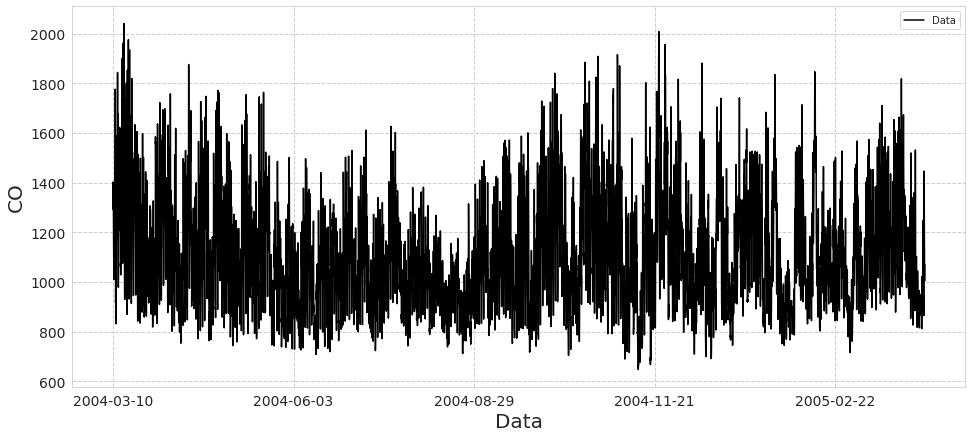

In [17]:
fig, ax =plt.subplots(figsize=(16,7))
ax.plot(df['PT08.S1(CO)'],'-', label='Data',color='black')
plt.grid(linestyle='--', linewidth=1)
ax.set_xticks(np.arange(0,10000,2000))
ax.set_xticklabels(df.loc[np.arange(0,10000,2000),'Date'])
ax.set_xlabel('Data',fontsize = 20)
ax.set_ylabel('CO',fontsize = 20)
plt.legend()
plt.show()


### Visualizando o comportamento dos dados pelos dias da semana.

In [18]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # convertendo a string para datetime64

In [19]:
# Criando uma variável que fala qual é o dia da semana 
df['Dia da Semana'] = df['Date'].dt.dayofweek
df.head()

Date  Time  PT08.S1(CO)  C6H6(GT)  ...     T    RH      AH  Dia da Semana
0 2004-03-10    18         1360      11.9  ...  13.6  48.9  0.7578              2
1 2004-03-10    19         1292       9.4  ...  13.3  47.7  0.7255              2
2 2004-03-10    20         1402       9.0  ...  11.9  54.0  0.7502              2
3 2004-03-10    21         1376       9.2  ...  11.0  60.0  0.7867              2
4 2004-03-10    22         1272       6.5  ...  11.2  59.6  0.7888              2

[5 rows x 14 columns]

* Legenda dos dados para os dias da semana:
 
 * 0 - Segunda feira
 * 1 - Terça feira
 * 2 - Quarta feira
 * 3 - Quinta Feira
 * 4 - Sexta feira
 * 5 - Sábado
 * 6 - Domingo


In [20]:
temp     = df.groupby(by=['Dia da Semana']).mean()['PT08.S1(CO)'].reset_index()
temp_std = df.groupby(by=['Dia da Semana']).std()['PT08.S1(CO)'].reset_index()

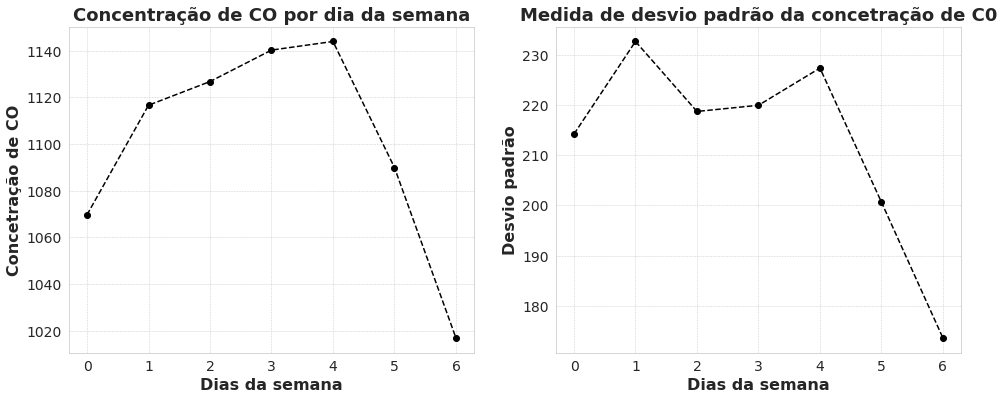

In [21]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(temp['PT08.S1(CO)'],'o--',color ='black')
plt.title('Concentração de CO por dia da semana', fontsize = 18,fontweight= 'bold')
plt.xlabel('Dias da semana', fontsize= 16, fontweight= 'bold')
plt.ylabel('Concetração de CO', fontsize= 16, fontweight= 'bold')
plt.grid(linestyle='--', linewidth=0.5)

plt.subplot(1,2,2)
plt.plot(temp_std['PT08.S1(CO)'],'o--',color ='black')
plt.title('Medida de desvio padrão da concetração de C0', fontsize = 18,fontweight= 'bold')
plt.xlabel('Dias da semana', fontsize= 16, fontweight= 'bold')
plt.ylabel('Desvio padrão', fontsize= 16, fontweight= 'bold')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

* Um ponto a se destacar é que aos domingos a menor produção de CO. Isso já é um comportamento a ser destacado já que é neste dia as pessoas tendem a ficar mais em casa.
 



### Concentração de C0 ao longo do horário da semana


In [22]:
cons_CO_0 = dist_semana_h (df,0) # segunda feira
cons_CO_1 = dist_semana_h (df,1) # terça feira
cons_CO_2 = dist_semana_h (df,2) # quarta feira
cons_CO_3 = dist_semana_h (df,3) # quinta feira
cons_CO_4 = dist_semana_h (df,4) # sexta feira
cons_CO_5 = dist_semana_h (df,5) # sabado feira
cons_CO_6 = dist_semana_h (df,6) # domingo feira

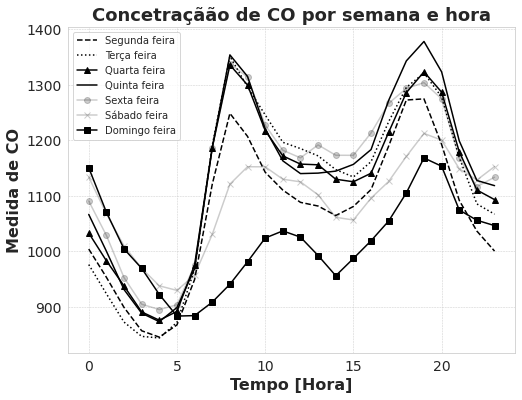

In [23]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)

plt.figure(figsize=(8,6))
plt.title('Concetraçãão de CO por semana e hora',size=18,fontweight= 'bold')
plt.plot(cons_CO_0.values,'--', color = 'Black',label = 'Segunda feira')
plt.plot(cons_CO_1.values,':',  color = 'Black',label = 'Terça feira')
plt.plot(cons_CO_2.values,'^-', color = 'Black',label = 'Quarta feira')
plt.plot(cons_CO_3.values,'-', color = 'Black',label = 'Quinta feira')
plt.plot(cons_CO_4.values,'o-', color = 'Black',label = 'Sexta feira', alpha = 0.2)
plt.plot(cons_CO_5.values,'x-', color = 'Black',label = 'Sábado feira', alpha =0.2)
plt.plot(cons_CO_6.values,'s-', color = 'Black',label = 'Domingo feira')

plt.legend()


plt.grid(linestyle='--', linewidth=0.5)
plt.ylabel('Medida de CO', size=16,fontweight= 'bold')
plt.xlabel('Tempo [Hora]', size=16,fontweight= 'bold')
plt.show()

* Um dado interessante é que no sábado e domingo a maior emissão de CO está às 19 Horas.
* Na segunda-feira o horário de maior emissão de CO também é às 19 horas, só que às 8 horas a taxa de emissão também está próxima.
* Entre terça-feira e sexta-feira o pico de emissão varia entre as 8 horas ou 19 horas. Sendo que se um é o maior o outro vai ser o segundo.
Tal comportamento candidata os dias da semana como uma nova variável para o banco de dados.
 



### Tendência da concentração de CO ao longo dos meses.

In [24]:
df['Mês'] = df['Date'].dt.month
ind = df['Mês'][df['Mês'].diff() != 0].index # inicio do mês
ind = ind[1:]

In [25]:
mes  =[]
std  =[]
erro =[]

for i in range(len(ind)):
  if i == 0:
    mes.append(df['PT08.S1(CO)'].loc[0:ind[i]-1].mean())
    std.append(df['PT08.S1(CO)'].loc[0:ind[i]-1].std())
    erro.append(df['PT08.S1(CO)'].loc[0:ind[i]-1].shape[0])
    print(df['Mês'].loc[ind[i]-1])

  if i > 0:
    mes.append(df['PT08.S1(CO)'].loc[ind[i-1]:ind[i]-1].mean())
    std.append(df['PT08.S1(CO)'].loc[ind[i-1]:ind[i]-1].std())
    erro.append(df['PT08.S1(CO)'].loc[ind[i-1]:ind[i]-1].shape[0])
    print(df['Mês'].loc[ind[i-1]])
    
mes.append(df['PT08.S1(CO)'].loc[ind[-1]:].mean())
std.append(df['PT08.S1(CO)'].loc[ind[-1]:].std())
erro.append(df['PT08.S1(CO)'].loc[ind[-1]:].shape[0])

3
4
5
6
7
8
9
10
11
12
1
2
3


In [26]:
std  = np.array(std)
mes  = np.array(mes)
erro = np.array(erro)
erro = std/np.sqrt(erro)

In [27]:
x_label = ['3','4','5','6','7','8','9','10','11','12','1','2','3-','4-']

In [28]:
#len(mes),len(x_label)

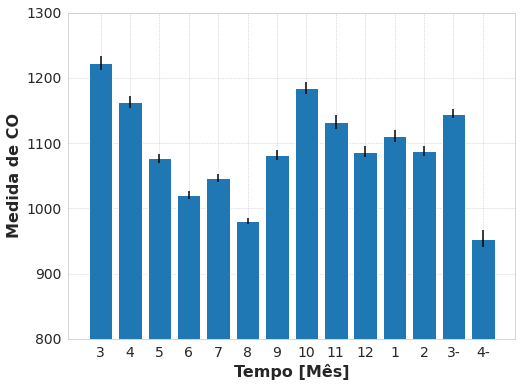

In [29]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.bar(x_label,mes,yerr =erro)
plt.ylim(800,1300)
plt.grid(linestyle='--', linewidth=0.5)
plt.ylabel('Medida de CO', size=16,fontweight= 'bold')
plt.xlabel('Tempo [Mês]', size=16,fontweight= 'bold')
plt.show()

* Um ponto a se destacar é de que tem medida de CO para o mesmo mês em anos diferentes e pelos resultados mostrados aparece que esses dados não são da mesma população.
 
* Isso mostra que pode ter acontecido algum tipo de intervenção para diminuir a taxa de CO.
 
* No mês de abril de 2005 houve uma queda considerável de CO mas há muitos poucos dados desse mês, por isso não será afirmado nada.
 
* Antes de partir para outra análise os dados do mês 3 de cada ano será olhado de mais perto.
 
 



In [30]:
print('Número de eventos para o mês 3 do ano de 2014:',df['PT08.S1(CO)'].loc[0:ind[0]-1].shape[0])
print('Número de eventos para o mês 3 do ano de 2015:',df['PT08.S1(CO)'].loc[ind[i-1]:ind[i]-1].shape[0])

Número de eventos para o mês 3 do ano de 2014: 510
Número de eventos para o mês 3 do ano de 2015: 743


In [31]:
dados0 = df['PT08.S1(CO)'].loc[0:ind[0]-1]
dados1 = df['PT08.S1(CO)'].loc[ind[i-1]:ind[i]-1]

In [32]:
print(np.min(dados0),np.min(dados1))
print(np.max(dados0),np.max(dados1))

818 715
2040 1818


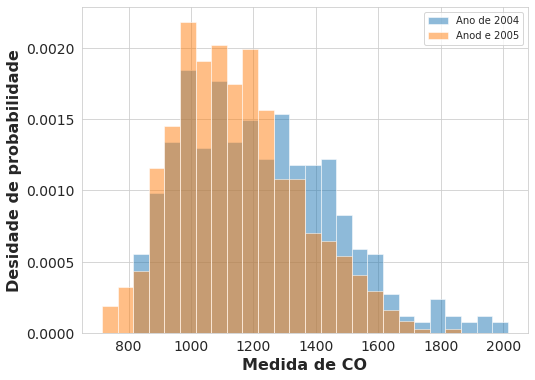

In [33]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.ylabel('Medida de CO', size=16,fontweight= 'bold')
plt.xlabel('Tempo [Mês]', size=16,fontweight= 'bold')
plt.hist(dados0,np.arange(np.min(dados1),np.max(dados0),50),density= True,alpha = 0.5,label = 'Ano de 2004')
plt.hist(dados1,np.arange(np.min(dados1),np.max(dados0),50),density= True,alpha = 0.5,label ='Anod e 2005')
plt.xlabel('Medida de CO', size=16,fontweight= 'bold')
plt.ylabel('Desidade de probabilidade', size=16,fontweight= 'bold')
plt.legend()
plt.show()

* A distribuição do ano de 2004 aparenta ser mais uniforme do que a de 2005.
* Mas para verificar de fato se existe algum tipo de intervenção para que a taxa de C0 tenha caído é preciso realizar mais medidas durante o ano de 2005.
* A única coisa que dá para afirmar é que as variáveis meses talvez não são uma boa escolha para o modelo, mas para verificar isso de fato será feito alguns testes.


### Tendência dos dados de Target.

In [34]:
df_pred = df.copy()
df_pred.index = df_pred.Date

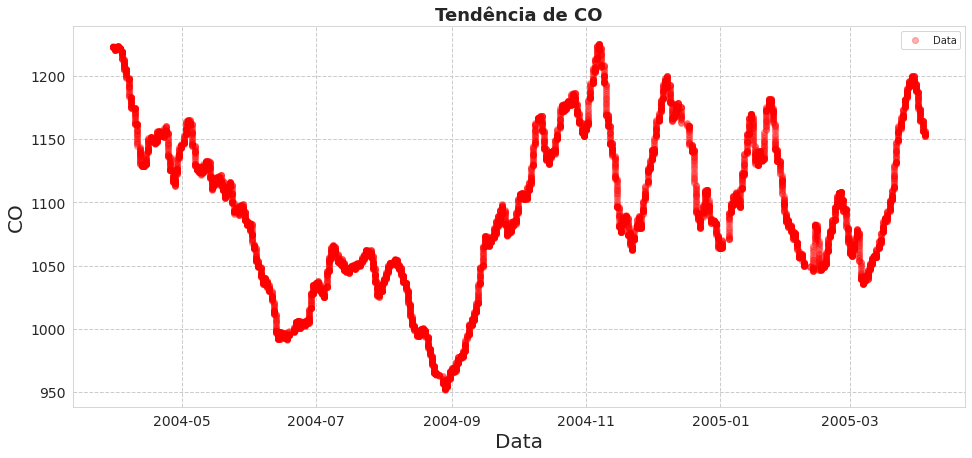

In [150]:

fig, ax =plt.subplots(figsize=(16,7))
plt.rcParams['timezone'] = 'America/Sao_Paulo'
plt.title('Tendência de CO',size=18,fontweight= 'bold')
ax.plot(df_pred['PT08.S1(CO)'].rolling(window=500).mean(),'o', label='Data',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
ax.set_ylabel('CO',fontsize = 20)
plt.legend()
plt.show()


- Claramente o comportamento dos dados está mostrando que existe uma mudança sazonal em um intervalo de alguns meses. Tal explicação pode estar acontecendo por causa da mudança das estações, devido que em dias frios o comportamento das pessoas mudam por exemplo.
- Por causa deste motivo será criado uma variável que mostra a estação do ano. Para criar ela será observado a variação da temperatura durante os dias. Pois, se os dias mais quentes ficam entre 1 junho a 31 agosto será considerado como verão ou entre 1 dezembro a 28 fevereiro. Este intervalo depende do hemisfério que se encontra na cidade.
- Tal afirmação é feita pelo fato que o verão nos países do hemisfério norte acontece entre 1 junho a 31 agosto e do hemisfério sul fica entre 1 dezembro a 28 fevereiro. Estes dados foram retirados desta referência: https://www.calendario-365.com.br/epocas-estacoes-do-ano.html.  
 



In [36]:
temp = df.groupby(by=['Date']).mean()['T'].reset_index()

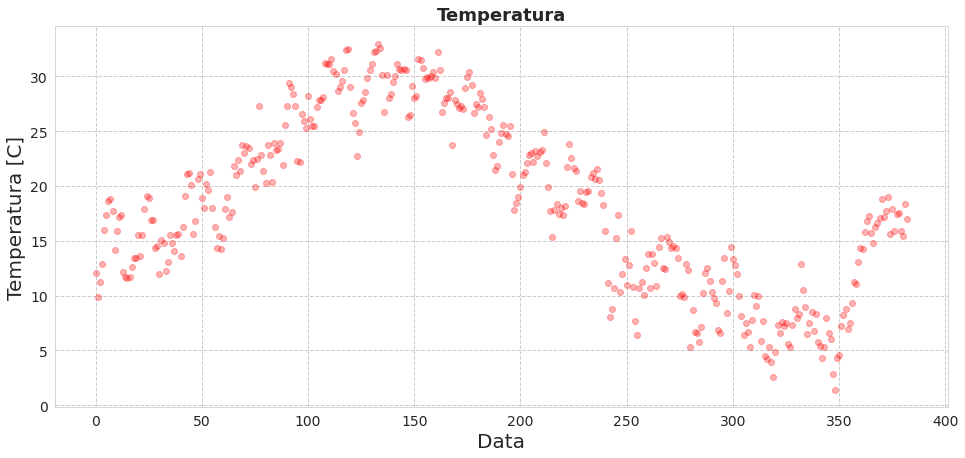

In [37]:

plt.rcParams['timezone'] = 'America/Sao_Paulo'
fig, ax =plt.subplots(figsize=(16,7))
plt.title('Temperatura',size=18,fontweight= 'bold')
ax.plot(temp['T'],'o', label='Data',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
ax.set_ylabel('Temperatura [C]',fontsize = 20)
plt.show()


* Pelo comportamento dos dados a cidade se trata do hemisfério Norte. 
  * Esta informação é interessante, devido que foi no período mais quente que aconteceu a menor medida de CO. 
  * Por causa desta informação será criado uma variável com as estações do ano nos seguintes dias:
    * Primavera: 1 março a 31 maio
    * Verão: 1 junho a 31 agosto
    * Outono: 1 setembro a 30 novembro
    * Inverno: 1 dezembro a 28 fevereiro
 



In [38]:
df = station(df)  # Criando a variável com as estações do ano
df.head()

Date  Time  PT08.S1(CO)  ...  Dia da Semana  Mês   Estações
0 2004-03-10    18         1360  ...              2    3  Primavera
1 2004-03-10    19         1292  ...              2    3  Primavera
2 2004-03-10    20         1402  ...              2    3  Primavera
3 2004-03-10    21         1376  ...              2    3  Primavera
4 2004-03-10    22         1272  ...              2    3  Primavera

[5 rows x 16 columns]

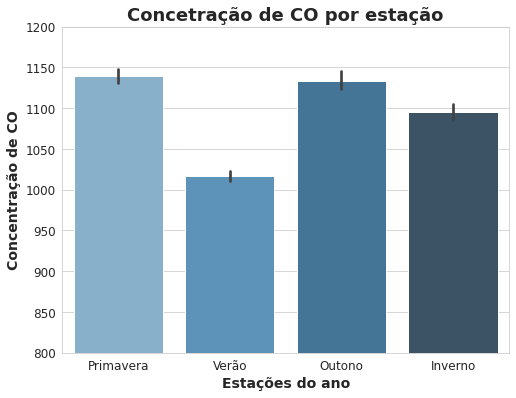

In [151]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8,6))
plt.title('Concetração de CO por estação',size=18,fontweight= 'bold')
sns.barplot(x ='Estações',y='PT08.S1(CO)',data = df,palette="Blues_d")
plt.xlabel('Estações do ano', fontsize = 14,fontweight= 'bold')
plt.ylabel('Concentração de CO', fontsize = 14,fontweight= 'bold')
plt.ylim(800,1200)
plt.show()

* Esse resultado mostra que em dias mais quentes tende a ter uma menor emissão de CO na atmosfera. Mas isso pode estar acontecendo porque nesta estação do ano países ao norte tendem a tirar férias.
 * Por esse motivo é recomendado que veja a relação entre a temperatura e os dados de Target para conferir se isso é verdade.
 
* Esses resultados mostram que claramente a série não é estacionária já que ela muda de nível por estações do ano. Isso pode ser um problema já que existem modelos de machine learning que têm dificuldade para aprender a tendência dos dados. Mas para esse caso talvez não seja necessário pois o modelo pode utilizar a temperatura ou a mudança das estações para aprender sobre a tendência da série temporal dos dados de Target.
 
* Antes de prosseguir com as análises será visto a distribuição dos dados de Target.
 



### Distribuição dos dados de Target.

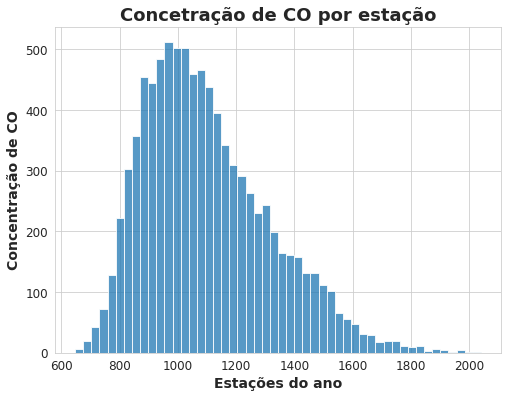

In [152]:
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(8,6))
plt.title('Concetração de CO por estação',size=18,fontweight= 'bold')
sns.histplot(df['PT08.S1(CO)'])
plt.xlabel('Estações do ano', fontsize = 14,fontweight= 'bold')
plt.ylabel('Concentração de CO', fontsize = 14,fontweight= 'bold')
plt.show()

* Os dados apresentaram uma distribuição simétrica à direita. Uma maneira de deixá-la próxima da distribuição normal é aplicando uma transformação logarítmica dos dados.
 
* Existem modelos de machine learning que apresentam uma melhor performance quando a distribuição dos dados apresentam um comportamento normal. Por isso será optado por essa transformação.


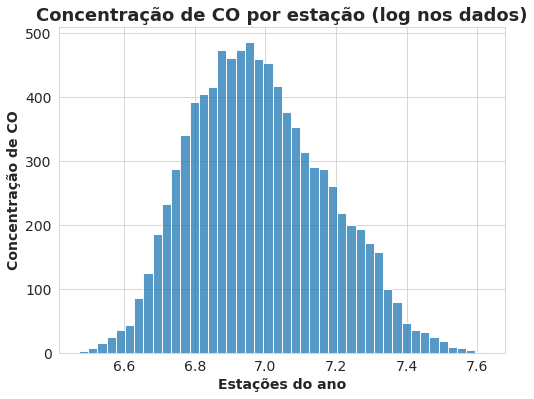

In [41]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Concentração de CO por estação (log nos dados)',size=18,fontweight= 'bold')
sns.histplot(np.log(df['PT08.S1(CO)']))
plt.xlabel('Estações do ano', fontsize = 14,fontweight= 'bold')
plt.ylabel('Concentração de CO', fontsize = 14,fontweight= 'bold')
plt.show()

In [42]:
df['Target_log'] = np.log10(df['PT08.S1(CO)'])

* Antes de prosseguir com as análises que serão feitas, será visto como o Target se correlacionado com as demais variáveis.


In [43]:
y1 = df.corr()['Target_log'].drop('PT08.S1(CO)')

y  = df.corr()['PT08.S1(CO)'].drop('PT08.S1(CO)')
x  = df.corr()['PT08.S1(CO)'].drop('PT08.S1(CO)').index

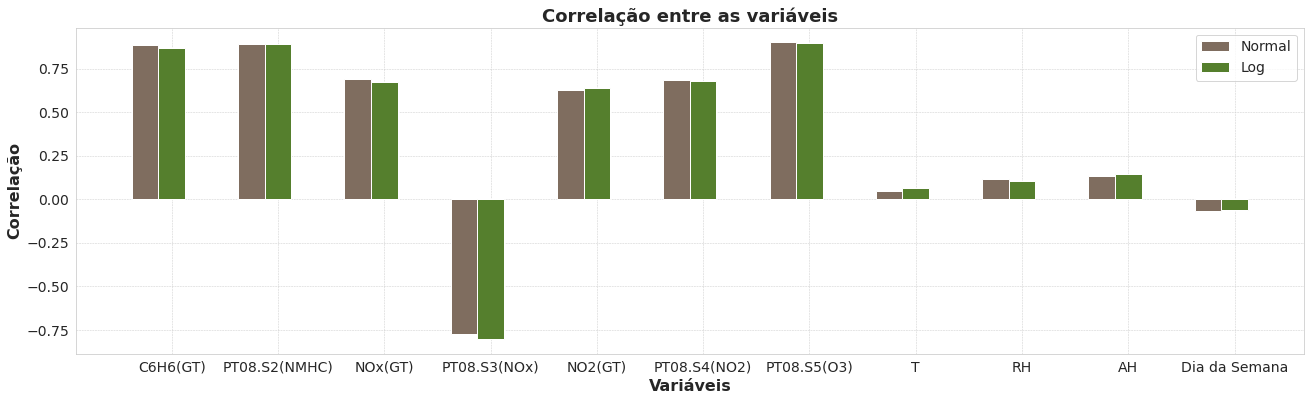

In [44]:
x  = x[1:-2]
y  = y[1:-2]
y1 = y1[1:-2]
barWidth = 0.25
r = np.arange(len(x))
r1 = [x + barWidth for x in r]

plt.figure(figsize=(22,6))
plt.title('Correlação entre as variáveis',size=18,fontweight= 'bold')
plt.bar(r, y, color='#7f6d5f', width=barWidth, edgecolor='white', label='Normal')
plt.bar(r1, y1, color='#557f2d', width=barWidth, edgecolor='white', label='Log')


plt.xlabel('Variáveis', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y))], x)


plt.legend(fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.ylabel('Correlação', size=16,fontweight= 'bold')
plt.xlabel('Variáveis', size=16,fontweight= 'bold')
plt.show()

* A aplicação de Log nos dados fez com que a correlação entre NOx(GT) e o Target piorace. 

* Teve casos em que a correção entre outras variáveis com o Target melhorou, como o caso da PTO8.S(NOx) e a Temperatura.
 
* Um ponto a se destacar é sobre a medida obtida pela variável PT08.S3(NOx). Pois ela é a única que apresenta correlação negativa com os dados de Target (sendo que esse valor é alto). Isso pode indicar algum tipo de princípio entre elas. 
 

 
 
 
 



### Autocorrelação e autocorrelação parcial
 
 



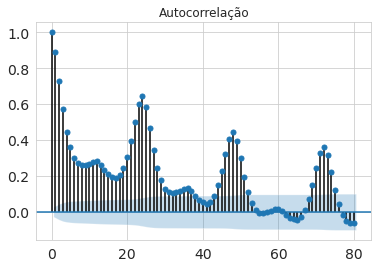

In [45]:
plot_acf(df['Target_log'], alpha = 0.01, lags=80,title = 'Autocorrelação');

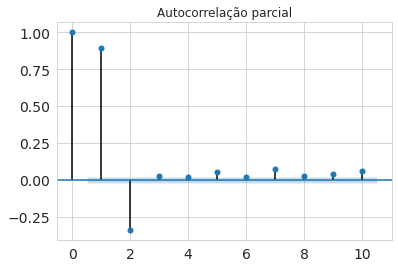

In [46]:
plot_pacf(df['Target_log'], alpha = 0.05, lags=10,title = 'Autocorrelação parcial');

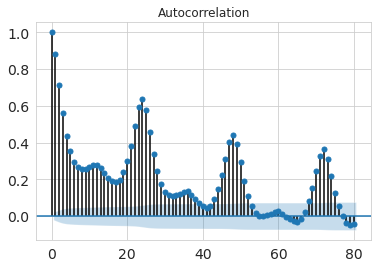

In [47]:
plot_acf(df['PT08.S1(CO)'], alpha = 0.05, lags=80);

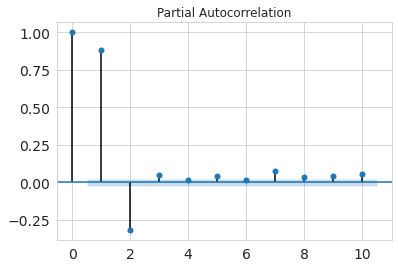

In [48]:
plot_pacf(df['PT08.S1(CO)'], alpha = 0.05, lags=10);

* Os gráficos mostram que a série temporal é altamente correlacionada é sazonal e que ela se repete a cada 24 horas.
 
* Um ponto a se destacar é a autocorrelação parcial de lag 1. Isso mostra que o valor anterior de CO tem uma grande influência no atual. Isso faz com que essa variável seja uma grande candidata como uma variável para o modelo de machine learning.
 
* Lags inferiores a 3 estão muito acima do intervalo de confiança. Isso faz com que elas também sejam candidatas para o modelo de machine learning. 

* As demais Lags estão muito baixas no valor da autocorrelação parcial. Isso mostra que a quantidade de CO lançado na atmosfera pode está se dispersando depois de 2 horas na região que os sensores estão medidos.

 
 



In [153]:
df['Target_log_dff_1'] = df.loc[:,'Target_log'].shift(1)
df['Target_log_dff_2'] = df.loc[:,'Target_log'].shift(2)

### Estacionaridade

* Verificando se a serie é estacionaria pelo teste de hipotese: 
  * p-valor > 0,05: Falha ao rejeitar a hipótese nula (H0), os dados têm raiz unitária e não são estacionários.
  * p-value <= 0,05: Rejeite a hipótese nula (H0), os dados não possuem raiz unitária e são estacionários.

In [50]:
from statsmodels.tsa.stattools import adfuller

In [54]:
#ADF-test(differenced-time-series)
res = adfuller(df['Target_log'],regression='c')
print('p-value:{}'.format(res[1]))


p-value:2.4440998677237752e-17


* Agora será prosseguido as análises para as demais variáveis do dataset.
 
#Análise para as demais variáveis.
 



In [55]:
df1 = df.copy()

* Em relação ao target as análises serão feitas a partir da transformada feita nos seus dados.
 



In [56]:
#df1 = df1.drop(columns='PT08.S1(CO)')

In [57]:
df1.index = df1.Date

In [58]:
columns = ['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
            'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T','RH', 'AH']

### C6H6(GT)

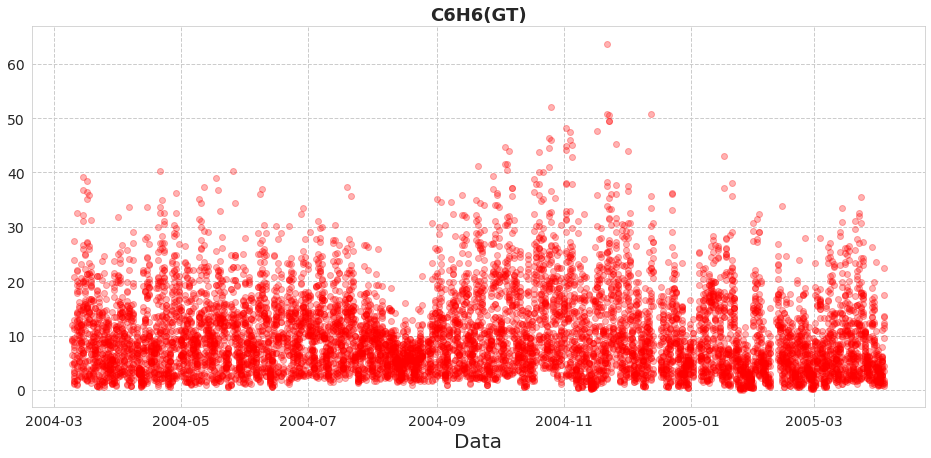

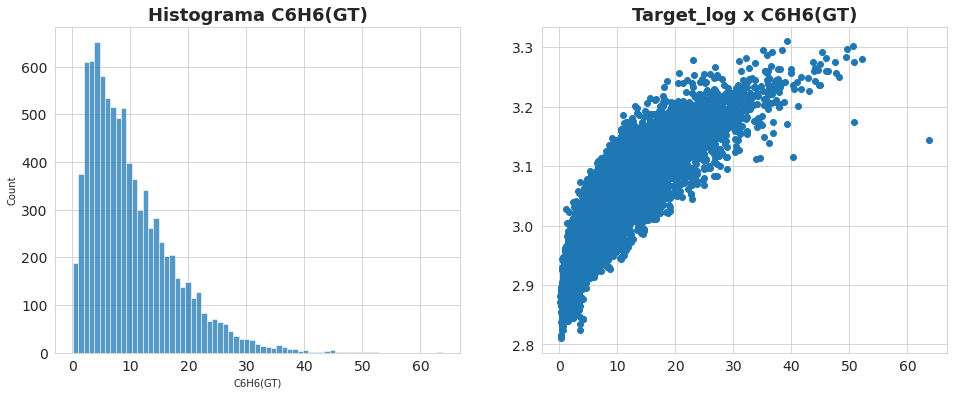

In [108]:
i = 0
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


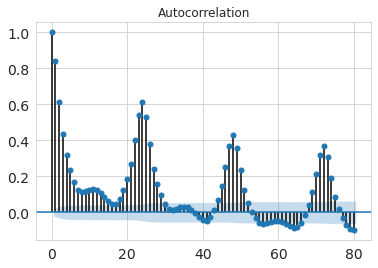

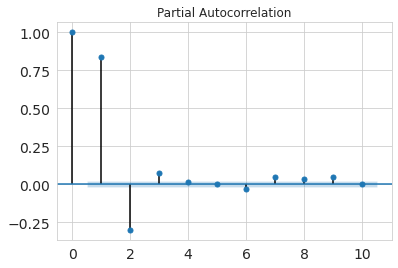

In [109]:
i = 0
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [110]:
estatistica_dados(df1[columns[i]])

Valor minimo:  0.1
Valor máximo:  63.7
Valor medio:   10.08310532754978
Valor std:     7.449405393614615
Valor modiana: 8.2
Valor moda:    3.598
Quartil 25%:   4.4
Quartil 75%:   14.0
Coef variação: 0.7388007118462621

Tipo de simetria da distribuição:
Assimetria positiva


In [111]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]],regression='c')
print('p-value:{}'.format(res[1]))


p-value:4.535045894363843e-18


* Não dá para afirmar algo se essa série temporal tem algum tipo de tendência.
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é simétrica à direita.
 
* Ela se relaciona com os dados de target de forma logarítmica ou quadrática.

* A série temporal é estacionária.
 
 




###PT08.S2(NMHC)

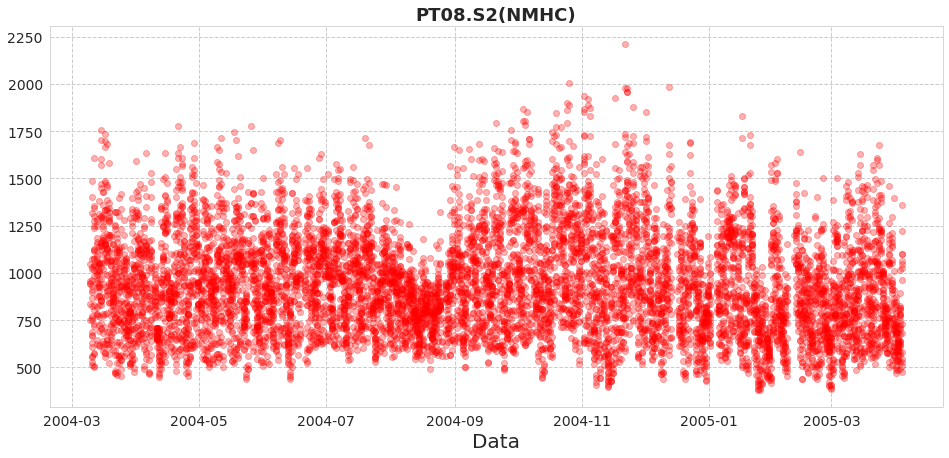

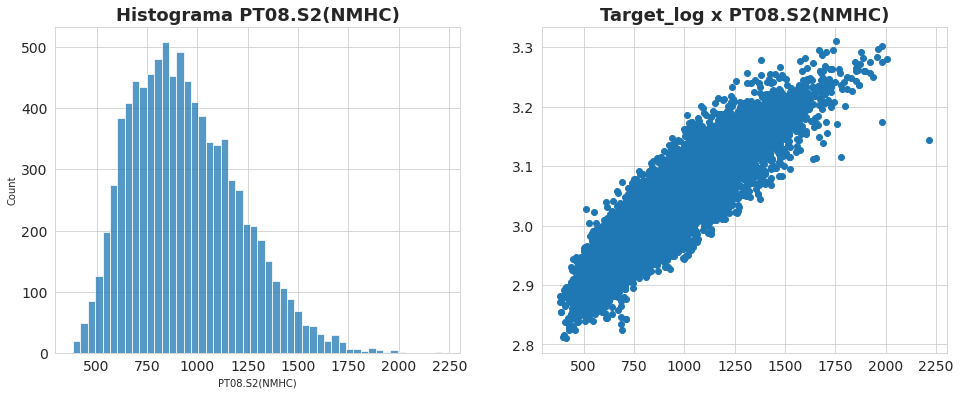

In [112]:
i = 1
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


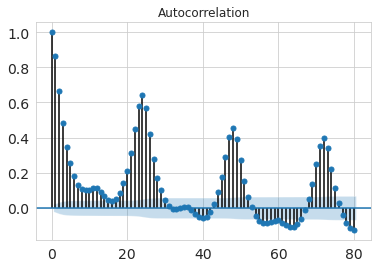

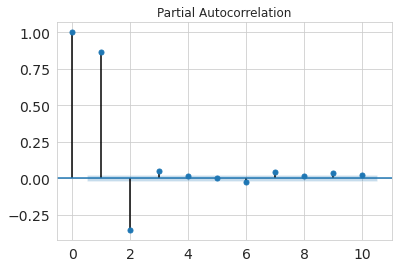

In [113]:
i = 1
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [114]:
estatistica_dados(df1[columns[i]])

Valor minimo:  383
Valor máximo:  2214
Valor medio:   939.1533755978201
Valor std:     266.81658938229003
Valor modiana: 909.0
Valor moda:    849.905
Quartil 25%:   734.5
Quartil 75%:   1116.0
Coef variação: 0.2841033172163677

Tipo de simetria da distribuição:
Assimetria positiva


In [115]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]],regression='c')
print('p-value:{}'.format(res[1]))


p-value:2.526186980861977e-18


* Não dá para afirmar algo se essa série temporal tem algum tipo de tendência.
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é bem próxima de uma gaussiana mas ela tem uma simetria positiva.
 
* Ela se relaciona com os dados de target de forma linear.
 
* Existe algumas observações atípicas.


* A série temporal é estacionária.

###  'NOx(GT)'

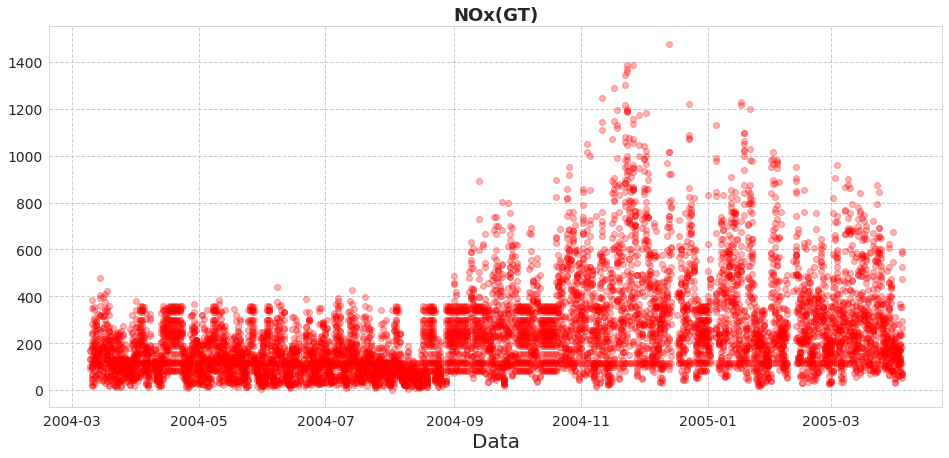

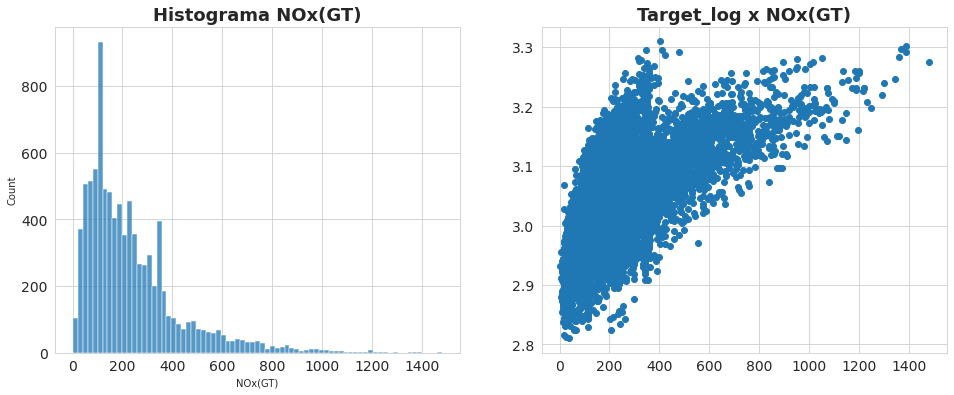

In [116]:
i = 2
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


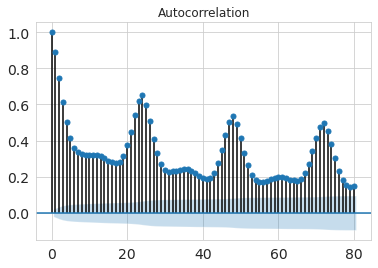

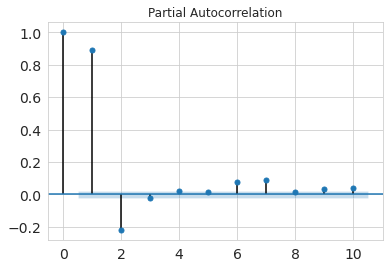

In [117]:
i = 2
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [118]:
estatistica_dados(df1[columns[i]])

Valor minimo:  2.0
Valor máximo:  1479.0
Valor medio:   237.21919497045394
Valor std:     191.43592203924186
Valor modiana: 186.0
Valor moda:    112.775
Quartil 25%:   108.0
Quartil 75%:   313.0
Coef variação: 0.8070001336236114

Tipo de simetria da distribuição:
Assimetria positiva


In [119]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]],regression='c')
print('p-value:{}'.format(res[1]))


p-value:8.963173585401877e-12


* Existe uma mudança de nível na série temporal, e ela acontece particularmente a partir de 09/2004.
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é assimétrica positiva.
 
* E a dispersão dos dados em relação ao valor médio é alta.
 
* Ela se relaciona com os dados de target de forma logarítmica ou quadrática claramente existem duas curvas nos dados. Isso pode acontecer por causa da mudança de nível da série temporal dos dados. Tal mudança pode estar acontecendo por algum tipo de variável qualitativa.
 * Vale conferir se isso está acontecendo de fato por esse motivo.
 
* A série temporal é estacionária.



### 'PT08.S3(NOx)'

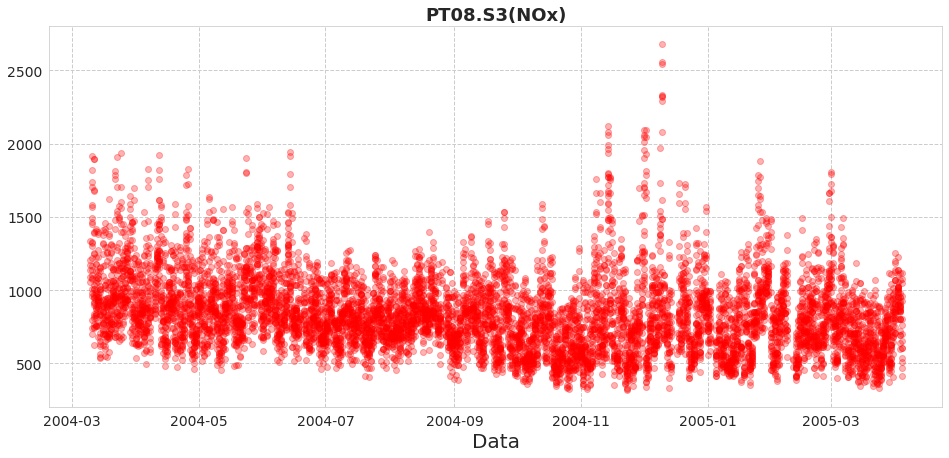

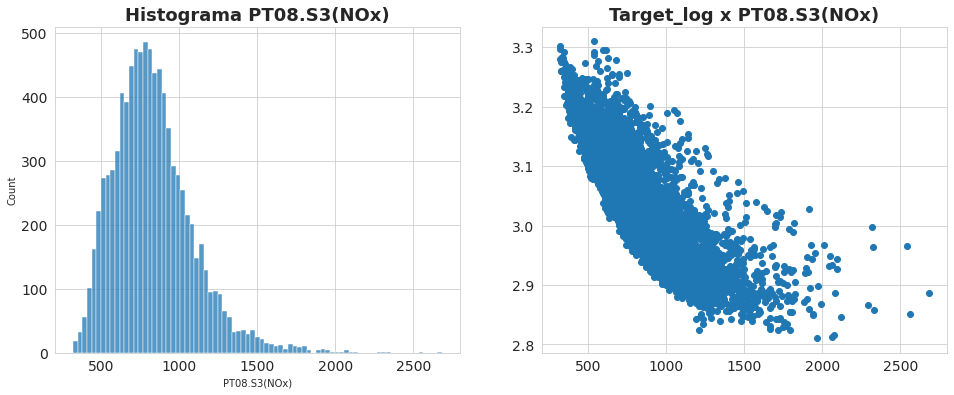

In [120]:
i = 3
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


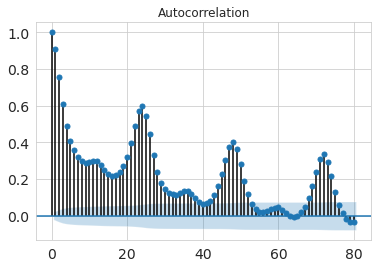

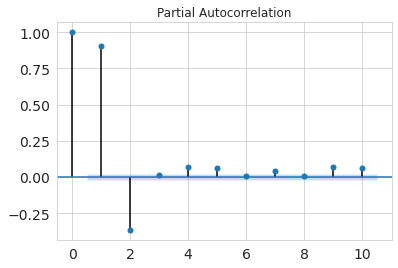

In [121]:
i = 3
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [122]:
estatistica_dados(df1[columns[i]])

Valor minimo:  322
Valor máximo:  2683
Valor medio:   835.4936047158269
Valor std:     256.80303770785855
Valor modiana: 806.0
Valor moda:    758.785
Quartil 25%:   658.0
Quartil 75%:   969.5
Coef variação: 0.3073668502767342

Tipo de simetria da distribuição:
Assimetria positiva


In [123]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]],regression='c')
print('p-value:{}'.format(res[1]))


p-value:5.837164259627233e-18


* Existe uma mudança de nível na série temporal em alguns períodos. (Pode esta acontecendo por causa das estações do ano)
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é simétrica a esquerda
 
* Ela se relaciona com os dados de target de forma próxima ao linear.
 
* É possível notar que existe uma tendência de outliers que pode está sendo provocada por uma segunda variável (do tipo categórica) ou possivelmente são informações advindas da estrutura de série temporal.

* A série temporal é estacionária.

 
 



### NO2(GT)

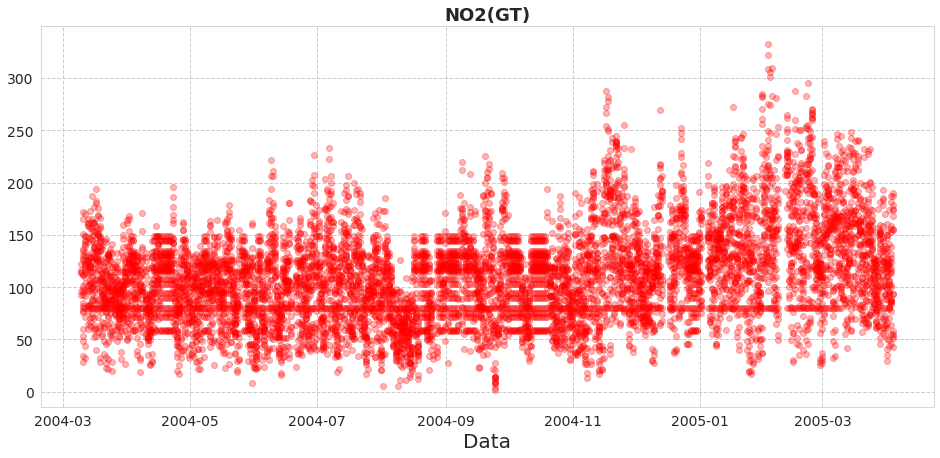

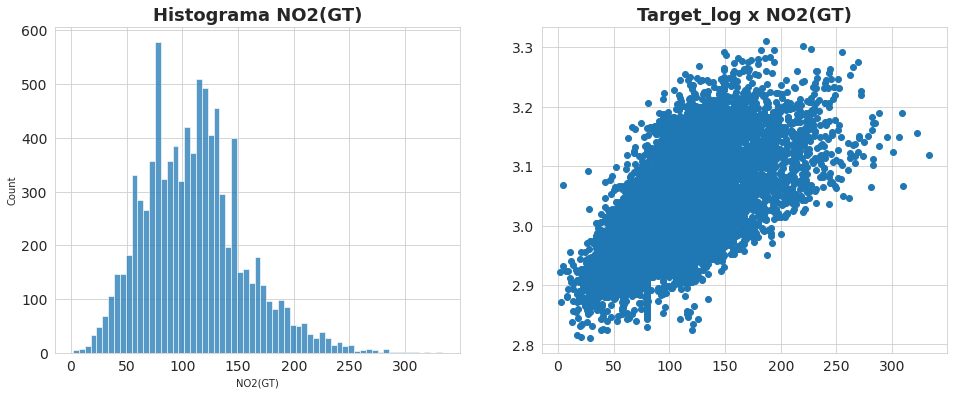

In [124]:
i = 4
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


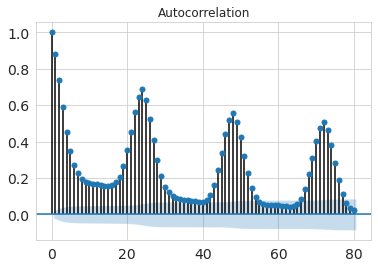

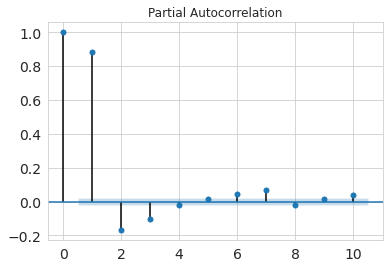

In [125]:
i = 4
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [126]:
estatistica_dados(df1[columns[i]])

Valor minimo:  2.0
Valor máximo:  333.0
Valor medio:   110.88031470345196
Valor std:     44.68695874473907
Valor modiana: 109.0
Valor moda:    79.785
Quartil 25%:   80.11538461538461
Quartil 75%:   135.0
Coef variação: 0.4030197683353785

Tipo de simetria da distribuição:
Assimetria positiva


In [128]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]])
print('p-value:{}'.format(res[1]))


p-value:2.919259734288912e-13


* Existe uma mudança de nível clara na série temporal em torno de 2004-11.
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é simétrica a esquerda
 
* Ela se relaciona com os dados de target de forma próxima do linear.
 * Vale o questionamento  de que mesmo tendo uma mudança de nível. A relação entre essa variável com os do Target aparentemente seguem o mesmo comportamento. Mas isso não é muito claro devido a existência de uma alta variabilidade nos dados.

* A série temporal é estacionária.




### PT08.S4(NO2)

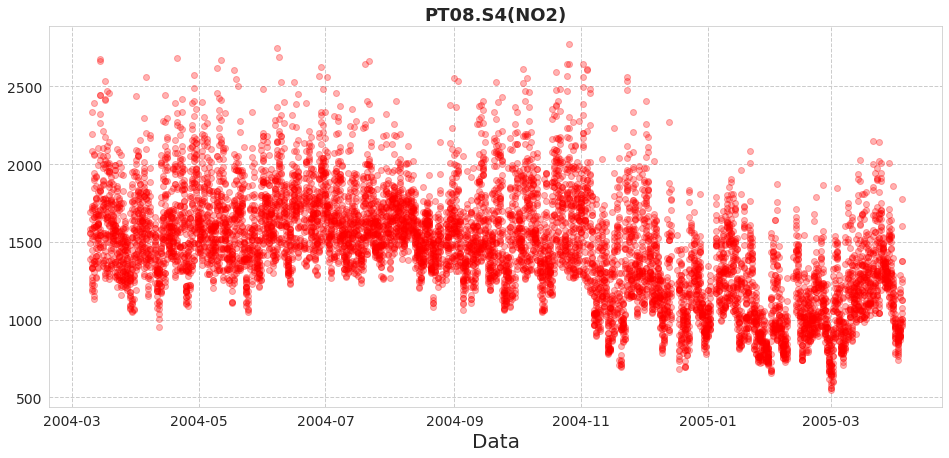

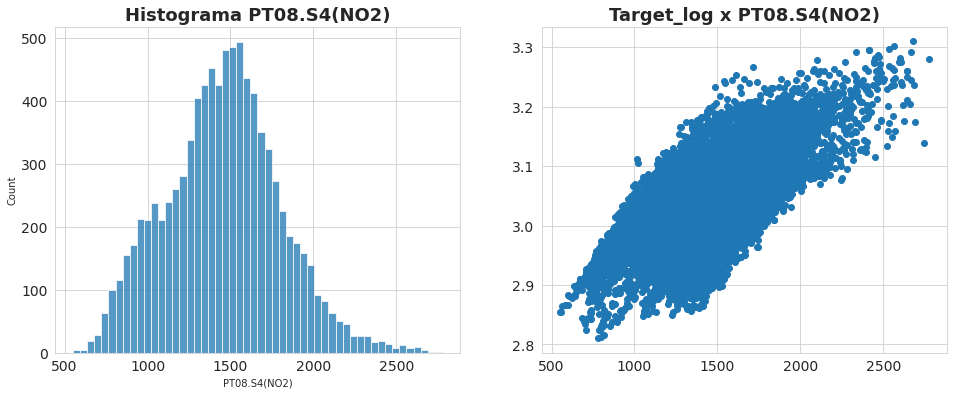

In [129]:
i = 5
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


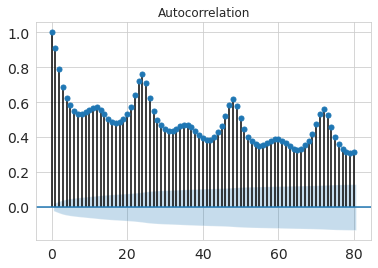

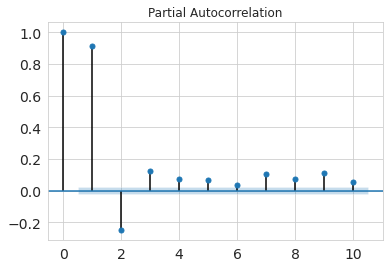

In [130]:
i = 5
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [131]:
estatistica_dados(df1[columns[i]])

Valor minimo:  551
Valor máximo:  2775
Valor medio:   1456.2645979312647
Valor std:     346.1875400282586
Valor modiana: 1463.0
Valor moda:    1540.6799999999998
Quartil 25%:   1227.0
Quartil 75%:   1674.0
Coef variação: 0.2377229663620502

Tipo de simetria da distribuição:
Assimetria negativa


In [132]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]])
print('p-value:{}'.format(res[1]))


p-value:1.2406518229566944e-07


* Existe uma mudança de nível clara nos dados.
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é assimétrica e negativa.
 
* Ela se relaciona com os dados de target de forma logarítmica ou quadrática.
 * Claramente existe mais de uma curva nessa relação. Ela pode estar  acontecendo pela mudança de nível nos dados que aconteceram a partir de 2004-11.

* A série temporal é estacionária.
 
 



### PT08.S5(O3)

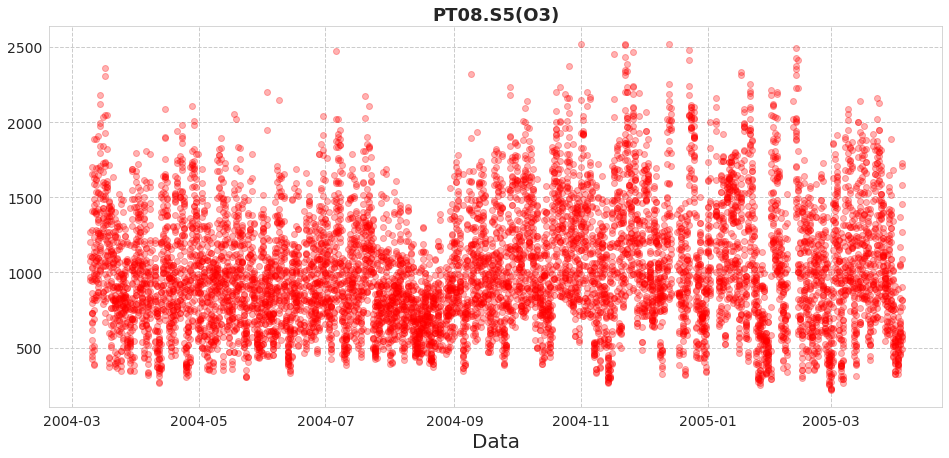

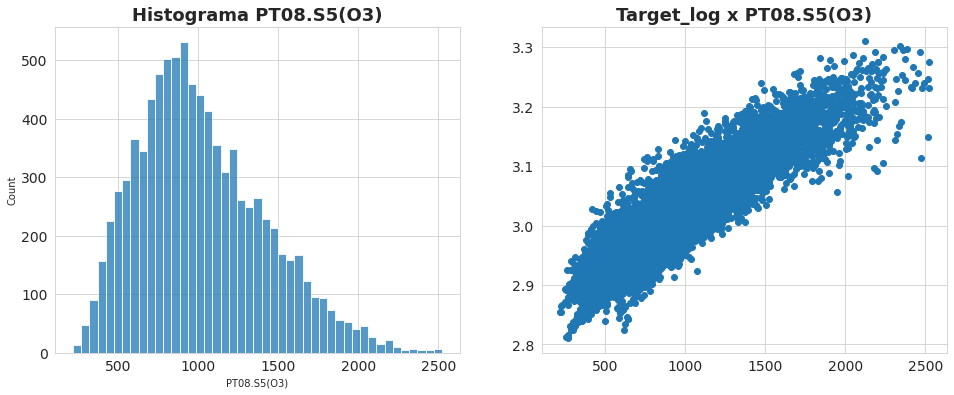

In [133]:
i = 6
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


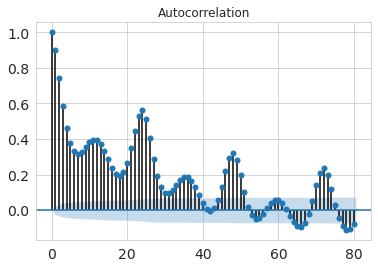

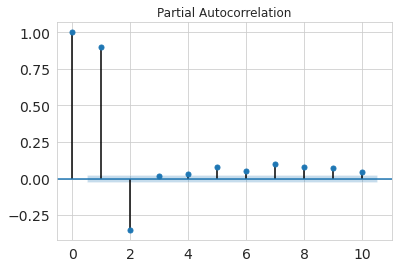

In [134]:
i = 6
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [135]:
estatistica_dados(df1[columns[i]])

Valor minimo:  221
Valor máximo:  2523
Valor medio:   1022.9061283505728
Valor std:     398.46212692909177
Valor modiana: 963.0
Valor moda:    900.09
Quartil 25%:   731.5
Quartil 75%:   1273.5
Coef variação: 0.3895392899557738

Tipo de simetria da distribuição:
Assimetria positiva


In [137]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]])
print('p-value:{}'.format(res[1]))


p-value:3.5107046288870257e-20


* Existe uma mudança de nível clara nos dados.
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição é assimétrica positiva.
 
* Ela se relaciona com os dados de target de forma logarítmica ou quadrática.
 
* O início do gráfico demonstra conjuntos de pontos que podem indicar a existência de dois grupos e tais grupos apresentam alterabilidade e tendência de reta. Como os dados estão bem próximos, os grupos podem estar misturados e com isso podemos não percebê-los.

* A série temporal é estacionária.

### Temperatura

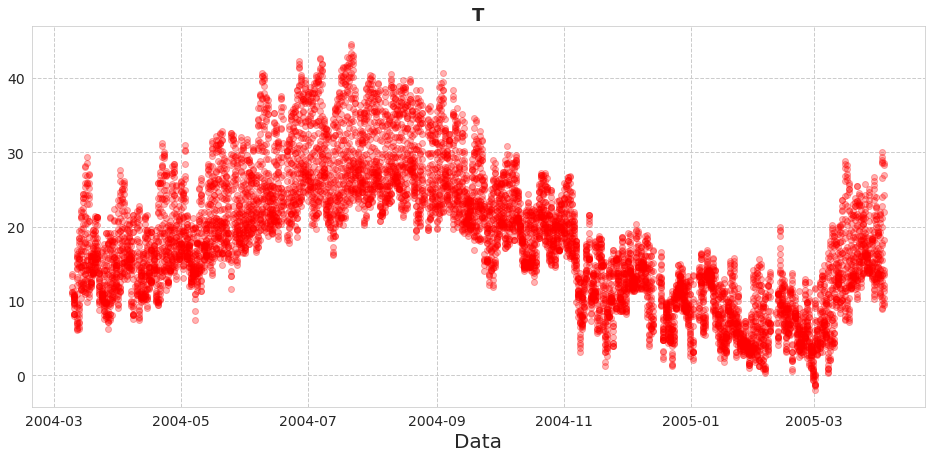

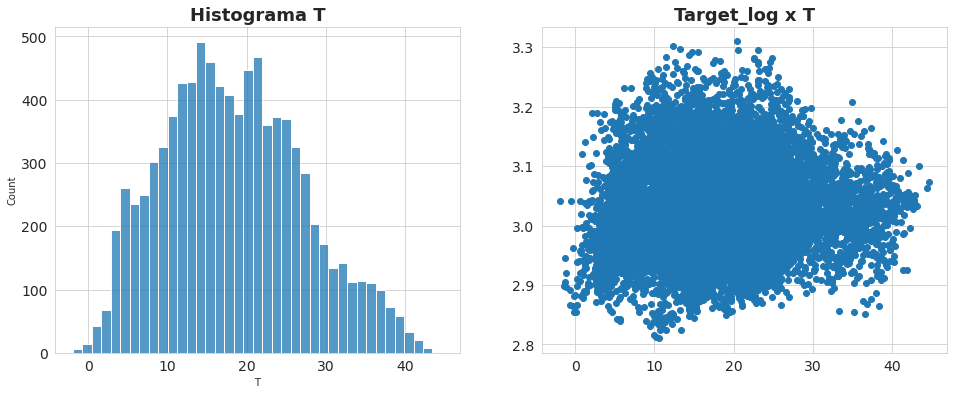

In [138]:
i = 7
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


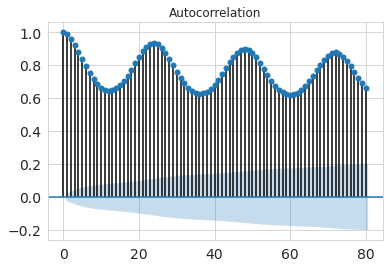

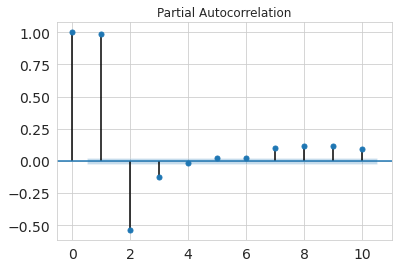

In [139]:
i = 7
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [140]:
estatistica_dados(df1[columns[i]])

Valor minimo:  -1.9
Valor máximo:  44.6
Valor medio:   18.31782894005115
Valor std:     8.831624553911436
Valor modiana: 17.8
Valor moda:    13.6775
Quartil 25%:   11.8
Quartil 75%:   24.4
Coef variação: 0.48213271249637374

Tipo de simetria da distribuição:
Assimetria positiva


In [141]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]])
print('p-value:{}'.format(res[1]))


p-value:0.05125027993145587


* Existe mudanças de nível clara nos dados. (Claramente isso acontece por causa das mudanças das estações)
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição tem assimetria positiva.
 
* Não existe uma relação clara com os dados de Target.
 * Com isso deixa claro que a mudança da tendência dos dados de Target não está sendo causada pela mudança apenas de temperatura mas sim por causa da mudança das estações do ano.

 * A série temporal será considerada estacionária já que o seu p-value esta próximo de 0.05.
 

### RH

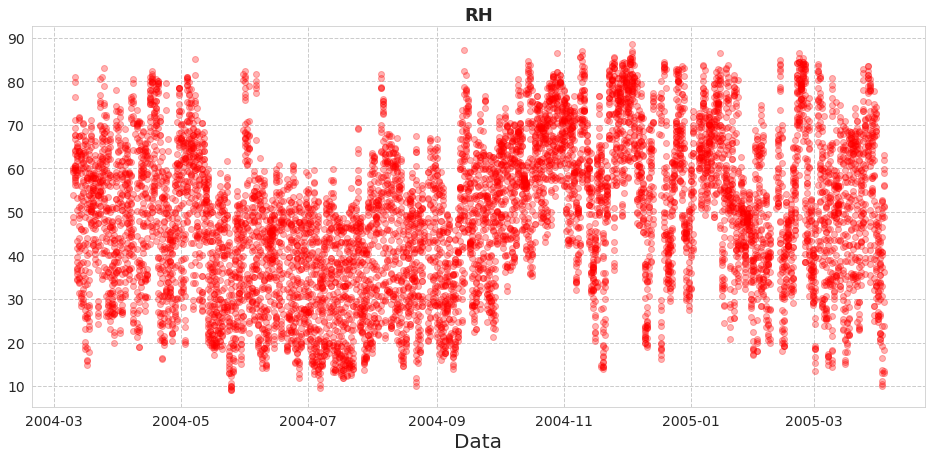

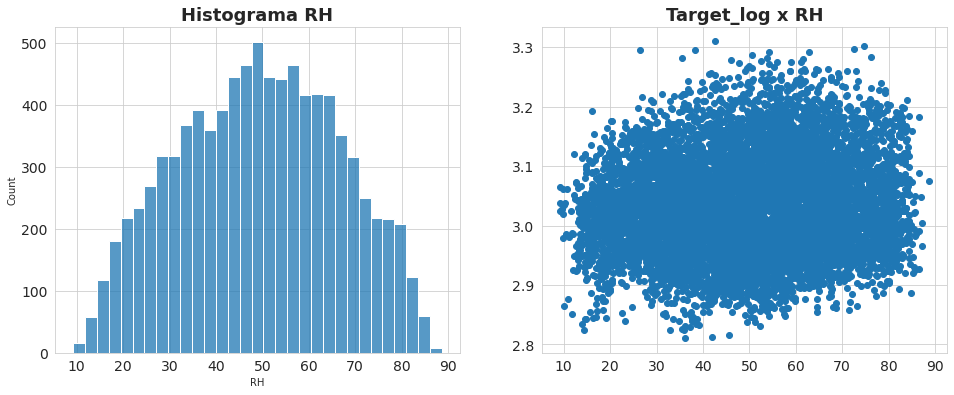

In [142]:
i = 8
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]])

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


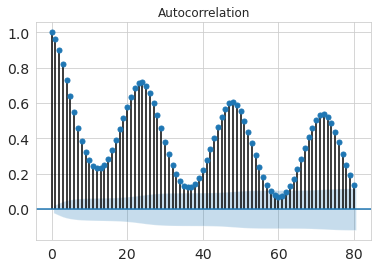

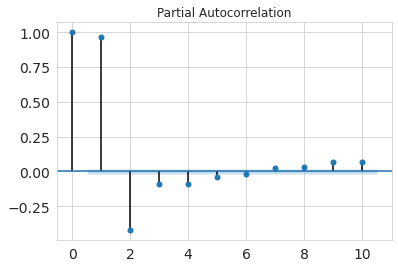

In [143]:
i = 8
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [144]:
estatistica_dados(df1[columns[i]])

Valor minimo:  9.2
Valor máximo:  88.7
Valor medio:   49.23420086753411
Valor std:     17.315929422673793
Valor modiana: 49.6
Valor moda:    47.7575
Quartil 25%:   35.8
Quartil 75%:   62.5
Coef variação: 0.35170530073724054

Tipo de simetria da distribuição:
Assimetria positiva


In [145]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]])
print('p-value:{}'.format(res[1]))


p-value:4.723381733370941e-12


* Existe mudanças de nível clara nos dados. (Claramente isso acontece por causa das mudanças das estações)
 
* Os dados apresentam uma sazonalidade diária.
 
* A sua distribuição tem assimetria positiva.
 
* Não existe uma relação clara com os dados de Target.

* A série temporal é estacionario.  



### AH

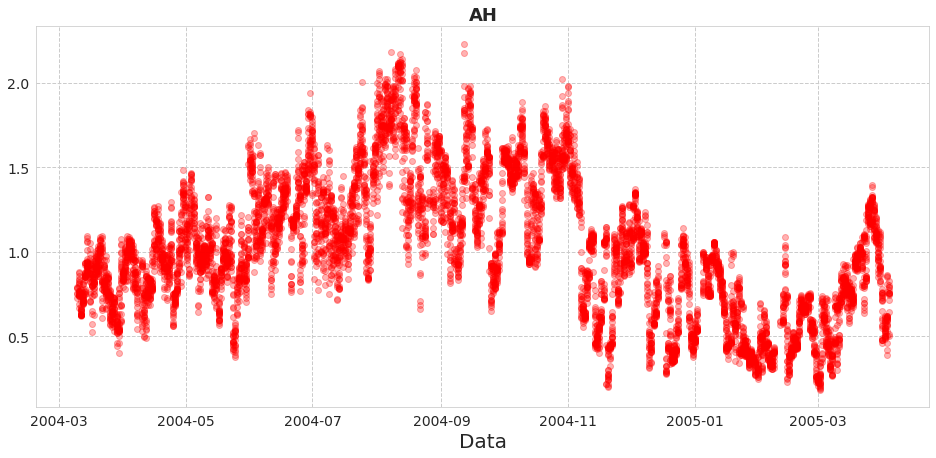

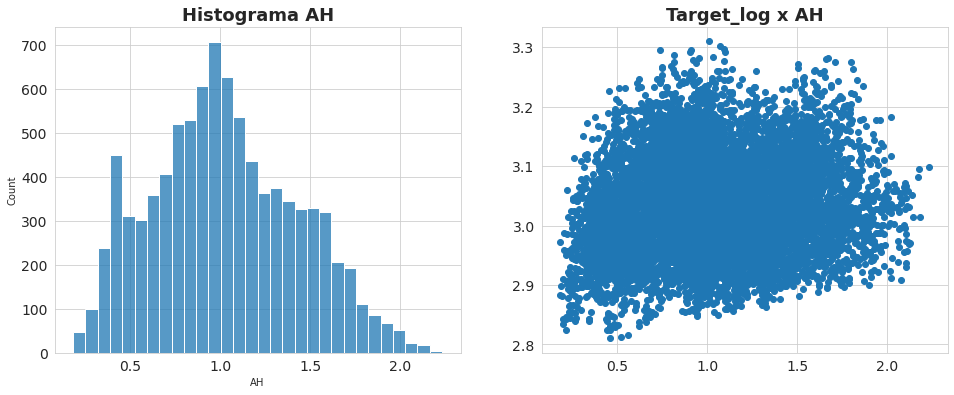

In [146]:
i = 9
fig, ax =plt.subplots(figsize=(16,7))
ax.set_title(columns[i],size=18,fontweight= 'bold')
ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
sns.histplot(df1[columns[i]],bins = 30)

plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(df1[columns[i]],df1['Target_log'],'o')


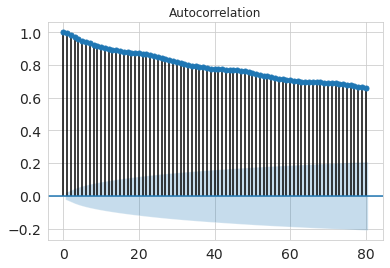

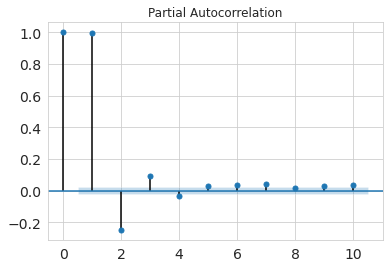

In [147]:
i = 9
plot_acf(df[columns[i]], alpha = 0.05, lags=80);
plot_pacf(df[columns[i]], alpha = 0.05, lags=10);

In [148]:
estatistica_dados(df1[columns[i]])

Valor minimo:  0.1847
Valor máximo:  2.231
Valor medio:   1.025530274719162
Valor std:     0.4037901489330811
Valor modiana: 0.9954
Valor moda:    0.9520624999999999
Quartil 25%:   0.7368
Quartil 75%:   1.3137
Coef variação: 0.39373791187554913

Tipo de simetria da distribuição:
Assimetria positiva


In [149]:
#ADF-test(differenced-time-series)
res = adfuller(df1[columns[i]],regression='c')
print('p-value:{}'.format(res[1]))


p-value:1.4244538490697018e-05


* Existe mudanças de nível clara nos dados. E ela está acontecendo próxima de 2004-11.
 
* Os dados apresentam ter uma sazonalidade diária, mas ela não é muito clara
 
* A sua distribuição tem assimetria positiva.
 
* Não é muito visível mas dá para perceber que existem dois grupos distintintos.

* A série tempora é estacionaria.
 
 
 
 



# Observações. 

* Agora será visto de mais perto as observações feitas.



### NOx(GT)
 * Conforme foi visto existem duas populações diferentes nos dados adquiridos pelo sensor NOx(GT). Isso pode estar relacionado pela mudança de nível dos dados que estão acontecendo por volta de 2004-09. Por esse motivo será visto agora se de fato isso está acontecendo por causa dessa mudança.
 



In [ ]:
i = 2
y0 = df1['Target_log'][df1.index<='2004-08-27']
y1 = df1['Target_log'][df1.index>'2004-08-27']

x0 = df1[columns[i]][df1.index<='2004-08-27']
x1 = df1[columns[i]][df1.index>'2004-08-27']

columns[2]

'NOx(GT)'

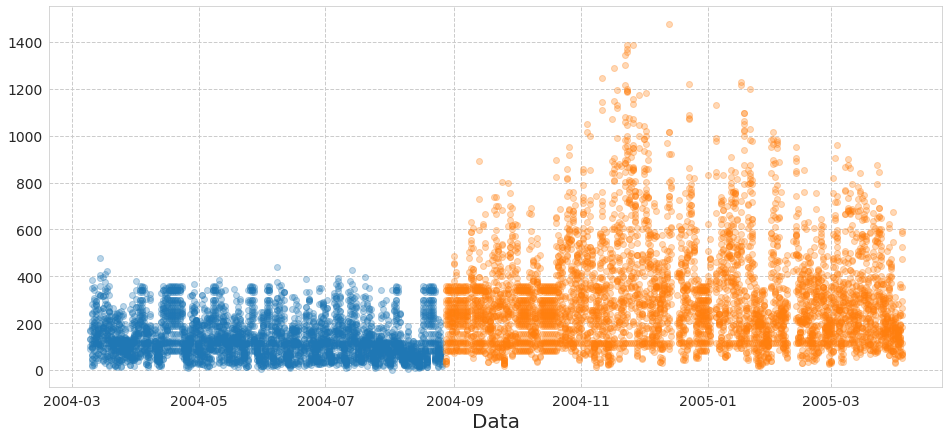

In [ ]:
# olhando de mais perto essa serie temporal
fig, ax =plt.subplots(figsize=(16,7))
ax.plot(x0,'o',alpha =0.3)
ax.plot(x1,'o',alpha =0.3)

plt.grid(linestyle='--', linewidth=1)
ax.set_xlabel('Data',fontsize = 20)
plt.show()

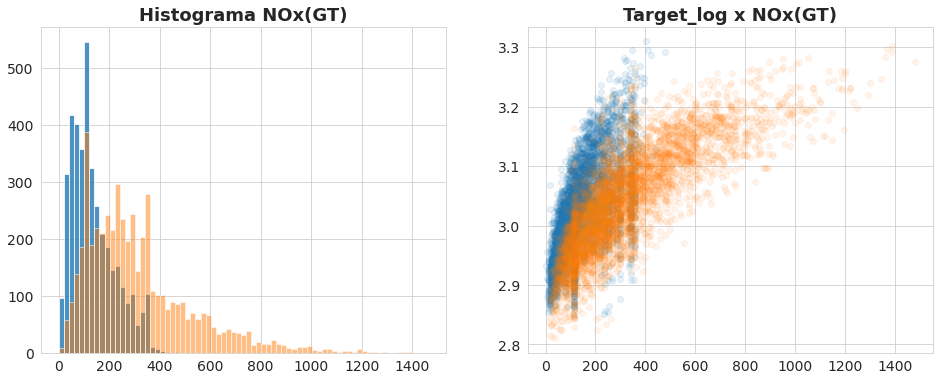

In [ ]:
i = 2
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Histograma ' + columns[i],size=18,fontweight= 'bold')
plt.hist(x0.values,bins = np.arange(np.min(x0),np.max(x1),20),alpha = 0.8)
plt.hist(x1.values,bins = np.arange(np.min(x0),np.max(x1),20),alpha = 0.5)



plt.subplot(1,2,2)
plt.title('Target_log x ' + columns[i],size=18,fontweight= 'bold')
plt.plot(x0,y0,'o',alpha=0.1)
plt.plot(x1,y1,'o',alpha=0.08)

* Esses resultados mostram que o comportamento distintos entre a relação dos dados de Target com essa variável se dá por causa da mudança de nível entre essas variáveis.
 
* Existem muitos dados dispersos da curva em azul.
 
* Essa variável pode ser um problema na hora da modelagem de um modelo de machine learning já que ela está indicando dois comportamentos distintos.
 * O seu uso não se torna recomendável já que é preciso entender qual foi o fenômeno que provocou isso nela.
 * Uma hipótese é de que seja usado apenas dados a partir da data de corte para o treinamento do modelo.
 
 



# Salvando dataset criado





In [ ]:
df.to_csv('/content/drive/My Drive/new_dados2.csv')

Index(['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'Dia da Semana', 'Mês', 'Estações', 'Target_log',
       'Target_log_dff_1', 'Target_log_dff_2', 'Target_log_dff_3'],
      dtype='object')

In [ ]:
df.head()

Date  Time  ...  Target_log_dff_2  Target_log_dff_3
0 2004-03-10    18  ...               NaN               NaN
1 2004-03-10    19  ...               NaN               NaN
2 2004-03-10    20  ...          3.133539               NaN
3 2004-03-10    21  ...          3.111263          3.133539
4 2004-03-10    22  ...          3.146748          3.111263

[5 rows x 20 columns]

In [ ]:
#np.log10(df['PT08.S1(CO)'])

# Conclusões:

* As análises mostram que os dados possuem uma sazonilidade de 24 horas. 

* Um dos fatores que afetam os niveis da seríe temporal do Target é quando ha uma mudança da estação do ano.

* Os dados mostram que os dados adquiridos pelo sensor NOx(GT) sofreu algum tipo de intervsão apartir do dia 27-08-2004. Já que os resultados deixam clara que a uma mudança de nivel na sua serie apartir dessa data e que a duas relações distintas entre o Target e os seus dados que foram adiquiridos antes e após esse dia.

In [ ]:
#ind,ind1,ind2,ind3,ind4= ind_esta(df1)

In [ ]:
#fig, ax =plt.subplots(figsize=(16,7))
#ax.set_title(columns[i],size=18,fontweight= 'bold')
#ax.plot(df1[columns[i]],'o',color='red',alpha =0.3)
#ax.fill_between(df1.index,np.min(df1[columns[i]]),np.max(df1[columns[i]]),ind,color = 'gray',alpha =0.05,label = 'Primavera' )
#ax.fill_between(df1.index,np.min(df1[columns[i]]),np.max(df1[columns[i]]),ind1,color = 'gray',alpha =0.1,label ='Versão')
#ax.fill_between(df1.index,np.min(df1[columns[i]]),np.max(df1[columns[i]]),ind2,color = 'red',alpha =0.05,label ='Outono')
#ax.fill_between(df1.index,np.min(df1[columns[i]]),np.max(df1[columns[i]]),ind3,color = 'red',alpha =0.1,label ='Inverno')
#ax.fill_between(df1.index,np.min(df1[columns[i]]),np.max(df1[columns[i]]),ind4,color = 'gray',alpha =0.05,label = 'Primavera' )

#ax.set_xlim(df1.index[0],df1.index[-1])
#ax.set_ylim(np.min(df1[columns[i]]),np.max(df1[columns[i]]))